# <font color = Crimson size = 6> <b>Группировка данных</b> </font>

***
## <font color = DarkGreen size = 5> <b>Комбинационная группировка</b> </font>

**Комбинационная группировка** \
– это группировка статистической совокупности совместно по двум или бОльшему количеству признаков. Она позволяет выявить устройство совокупности и установить взаимосвязи между её признаками.

In [1]:
from math import log10
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

##### <font color = SlateBlue size = 3> Пример </font>

**Имеются выборочные данные о выпуске продукции (млн. руб.) и сумме прибыли (млн. руб.) по 30 предприятиям.**

**Определить признак-фактор и признак-результат и высказать предположение о наличии и направлении корреляционной зависимости между признаками. Выполнить комбинационную группировку, разбив значения признака-фактора на 5 равных интервалов, а значения признака-результата – на 3 равных интервала. Сделать выводы.**

Признаком-фактором (причиной) является $X$ – выпуск продукции, а признаком-результатом (следствием) $Y$ – прибыль. При увеличении выпуска продукции, очевидно, растёт средняя прибыль предприятий, таким образом, предполагаемая корреляционная зависимость – прямая.

Выполним комбинационную группировку, разбив значения признака-фактора на 5 равных интервалов, а значения признака-результата – на 3.

In [2]:
df = pd.DataFrame({'ncomp': list(range(1,31)),
                   'output': [65, 78, 41, 54, 66, 80, 45, 57, 67, 81, 92, 48, 59,  68, 83,
                              52, 62, 69, 85, 70, 71, 64, 72, 88, 73, 74, 96, 75, 101, 76],
                   'margin': [15.7, 18.0, 12.1, 13.8, 15.5, 17.9, 12.8, 14.2, 15.9, 17.6, 18.2, 13.0, 15.5, 16.2, 16.7,
                              14.6, 14.8, 16.1, 16.7, 15.8, 16.4, 15.0, 16.5, 18.5, 16.4, 16.0, 19.1, 16.3, 19.6, 17.2]
                  })
df

,ncomp,output,margin
0,1,65,15.7
1,2,78,18.0
2,3,41,12.1
3,4,54,13.8
4,5,66,15.5
5,6,80,17.9
6,7,45,12.8
7,8,57,14.2
8,9,67,15.9
9,10,81,17.6


Упорядочим совокупность по признаку-фактору $X$: расположим предприятия по возрастанию выпуска продукции.

In [3]:
df.sort_values('output', inplace=True, ignore_index=True)
df

,ncomp,output,margin
0,3,41,12.1
1,7,45,12.8
2,12,48,13.0
3,16,52,14.6
4,4,54,13.8
5,8,57,14.2
6,13,59,15.5
7,17,62,14.8
8,22,64,15.0
9,1,65,15.7


Теперь выполняем группировку совокупности – опять же по признаку-фактору (выпуску продукции). Используем стандартную равноинтервальную группировку. Оптимальное количество интервалов определим по формуле Стерджеса: $k = 1 + 3.322\cdot\lg{n}$

In [4]:
n = df.shape[0]
k = int(1 + 3.322 * log10(n))
k

5

Длина интервала: $\displaystyle h = \frac{x_{max}-x_{min}}{k}$

In [5]:
x_min, x_max = df['output'].min(), df['output'].max()
h = (x_max - x_min)/k
h

12.0

In [6]:
def intX(x):
    binsX = [[41,53],[53,65],[65,77],[77,89],[89,101.0001]]
    for i in binsX:
        if i[0] <= x < i[1]:
            return pd.Interval(left = i[0], right = int(i[1]), closed='left')

In [7]:
df['intX'] = df['output'].apply(intX)
df

,ncomp,output,margin,intX
0,3,41,12.1,"[41, 53)"
1,7,45,12.8,"[41, 53)"
2,12,48,13.0,"[41, 53)"
3,16,52,14.6,"[41, 53)"
4,4,54,13.8,"[53, 65)"
5,8,57,14.2,"[53, 65)"
6,13,59,15.5,"[53, 65)"
7,17,62,14.8,"[53, 65)"
8,22,64,15.0,"[53, 65)"
9,1,65,15.7,"[65, 77)"


Теперь в каждой группе нужно выделить подгруппы, условно говоря, предприятия с небольшой, средней и высокой прибылью (3 интервала по условию). Для этого берём исходные значения признака-результата (прибыли) и сортируем их по возрастанию.

In [8]:
df.sort_values('margin', inplace=True, ignore_index=True)
y_min, y_max = df['margin'].min(), df['margin'].max()
h = (y_max - y_min)/3
h

2.5000000000000004

In [9]:
def intY(y):
    binsY = [[12.1,14.6],[14.6,17.1],[17.1,19.6075]]
    for i in binsY:
        if i[0] <= y < i[1]:
            return pd.Interval(left = i[0], right = round(i[1],1), closed='left')

In [10]:
df['intY'] = df['margin'].apply(intY)
df

,ncomp,output,margin,intX,intY
0,3,41,12.1,"[41, 53)","[12.1, 14.6)"
1,7,45,12.8,"[41, 53)","[12.1, 14.6)"
2,12,48,13.0,"[41, 53)","[12.1, 14.6)"
3,4,54,13.8,"[53, 65)","[12.1, 14.6)"
4,8,57,14.2,"[53, 65)","[12.1, 14.6)"
5,16,52,14.6,"[41, 53)","[14.6, 17.1)"
6,17,62,14.8,"[53, 65)","[14.6, 17.1)"
7,22,64,15.0,"[53, 65)","[14.6, 17.1)"
8,13,59,15.5,"[53, 65)","[14.6, 17.1)"
9,5,66,15.5,"[65, 77)","[14.6, 17.1)"


In [11]:
def grey_zero(x):
    return np.where(x == 0, f"color: lightgrey ;", None)


df.pivot_table(
    index = 'intY',
    columns = 'intX',
    values = 'ncomp',
    aggfunc = 'count',
    fill_value = 0,
    margins=True
).style.apply(grey_zero, axis=None)

intX,"[41, 53)","[53, 65)","[65, 77)","[77, 89)","[89, 101)",All
intY,,,,,,
"[12.1, 14.6)",3,2,0,0,0,5
"[14.6, 17.1)",1,3,11,2,0,17
"[17.1, 19.6)",0,0,1,4,3,8
All,4,5,12,6,3,30


Если частоты имеют тенденцию располагаться по диагонали от левого верхнего до правого нижнего угла, то между признаками существует прямая корреляционная зависимость.

Если частоты имеют тенденцию располагаться по диагонали от левого нижнего до правого верхнего угла, то между признаками существует обратная корреляционная зависимость.

Если частоты расположены хаотично, без явной закономерности, то корреляционная зависимость отсутствует либо является слабой.

***
### <font color = MediumBlue size = 4> <b>Эмпирический коэффициент детерминации</b> </font>

Чтобы оценить СУЩЕСТВЕННОСТЬ ВЛИЯНИЯ фактора, который лёг в основу группировки рассчитывают **эмпирический коэффициент детерминации** (*причинности*), равный отношению *межгрупповой* дисперсии к дисперсии *общей*: \
$\eta^2 = \cfrac{\delta^2}{\sigma^2}$

Общая дисперсия $\sigma^2$ характеризует *меру вариации* всей совокупности, т.е. **общая дисперсия учитывает все причины (факторы), которые обуславливают вариацию**.

**Межгрупповая дисперсия** учитывает влияние фактора, положенного в основу группировки.

**Эмпирический коэффициент детерминации** характеризует ДОЛЮ влияния группировочного фактора. Данный коэффициент изменяется в пределах $0 \leq \eta^2 \leq 1$, и чем он ближе к единице, тем сильнее влияние группировочного фактора на признак-результат.

##### <font color = SlateBlue size = 3> Пример </font>

Сначала нужно перейти к дискретным рядам, выбрав в качестве вариант $x_i$ и $y_j$ середины соответствующих интервалов.

In [12]:
df['intX_mid'] = df['intX'].apply(lambda x: x.mid).astype(int)
df['intY_mid'] = df['intY'].apply(lambda x: x.mid).round(2)
df

,ncomp,output,margin,intX,intY,intX_mid,intY_mid
0,3,41,12.1,"[41, 53)","[12.1, 14.6)",47,13.35
1,7,45,12.8,"[41, 53)","[12.1, 14.6)",47,13.35
2,12,48,13.0,"[41, 53)","[12.1, 14.6)",47,13.35
3,4,54,13.8,"[53, 65)","[12.1, 14.6)",59,13.35
4,8,57,14.2,"[53, 65)","[12.1, 14.6)",59,13.35
5,16,52,14.6,"[41, 53)","[14.6, 17.1)",47,15.85
6,17,62,14.8,"[53, 65)","[14.6, 17.1)",59,15.85
7,22,64,15.0,"[53, 65)","[14.6, 17.1)",59,15.85
8,13,59,15.5,"[53, 65)","[14.6, 17.1)",59,15.85
9,5,66,15.5,"[65, 77)","[14.6, 17.1)",71,15.85


In [13]:
df_pivot1 = df.pivot_table(
    index = 'intY_mid',
    columns = 'intX_mid',
    values = 'ncomp',
    aggfunc = 'count',
    fill_value = 0,
    margins=True
)

df_pivot1.style.apply(grey_zero, axis=None)

intX_mid,47,59,71,83,95,All
intY_mid,,,,,,
13.350000,3,2,0,0,0,5
15.850000,1,3,11,2,0,17
18.350000,0,0,1,4,3,8
All,4,5,12,6,3,30


Вычислим общую среднюю и общую дисперсию признака-результата

In [14]:
df_groupY = (df.groupby('intY_mid')
               .agg({'ncomp': 'count'})
               .reset_index()
               .rename(columns={'ncomp': 'mi'})
            )

My = sum(df_groupY['intY_mid'] * df_groupY['mi'])/n
My

16.1

In [15]:
Dy = sum((df_groupY['intY_mid'] - My)**2 * df_groupY['mi'])/n
Dy

2.6458333333333353

Для нахождения межгрупповой дисперсии вычислим групповые или, как их называют, **условные средние**.

In [16]:
df_pivot2 = df.pivot_table(
    index = ['intX_mid','intY_mid'],
    values = 'ncomp',
    aggfunc = 'count',
    fill_value = 0
    #margins=True
).reset_index()

df_pivot2['yn'] = df_pivot2['intY_mid'] * df_pivot2['ncomp']
df_pivot2

,intX_mid,intY_mid,ncomp,yn
0,47,13.35,3,40.05
1,47,15.85,1,15.85
2,59,13.35,2,26.70
3,59,15.85,3,47.55
4,71,15.85,11,174.35
5,71,18.35,1,18.35
6,83,15.85,2,31.70
7,83,18.35,4,73.40
8,95,18.35,3,55.05


In [17]:
df_groupX = (df_pivot2.groupby('intX_mid')
               .agg({'yn': 'sum', 'ncomp': 'sum'})
               .reset_index()
               .rename(columns={'ncomp': 'ni'})
            )

df_groupX['My'] = df_groupX['yn'] / df_groupX['ni']
df_groupX

,intX_mid,yn,ni,My
0,47,55.90,4,13.975000
1,59,74.25,5,14.850000
2,71,192.70,12,16.058333
3,83,105.10,6,17.516667
4,95,55.05,3,18.350000


Вычислим межгрупповую дисперсию

In [18]:
d = sum((df_groupX['My'] - My)**2 * df_groupX['ni'])/n
d

1.7708333333333357

Вычислим эмпирический коэффициент детерминации:

In [19]:
eta2 = d / Dy
eta2

0.6692913385826775

Таким образом, 66,93% вариации прибыли обусловлено изменением  выпуска продукции. Остальные 33,07% вариации обусловлены другими факторами.

***
Исходя из правила сложения дисперсий $\sigma_y^2 = \bar{\sigma_y^2} + \delta_y^2$, легко понять, что за остальную вариацию отвечает внутригрупповая дисперсия $\bar{\sigma_y^2}$, графически она характеризует меру разброса частот в столбцах.

Чем ближе $\eta^2$ к единице, тем больше межгрупповая дисперсия $\delta_y^2$ и меньше $\bar{\sigma_y^2}$. Высокое значение $\delta_y^2$ говорит о том, что групповые средние $\bar{y_i}$ знАчимо отличаются от общей средней $\bar{y}$, то есть изменение значений «икс» приводит к существенному изменению значений «игрек». Иными словами, признак-фактор действительно оказывает сильное влияние. При этом внутригрупповая дисперсия $\bar{\sigma_y^2}$ будет малА и частоты в серой области примут выраженный диагональный вид. В предельном случае $\delta_y^2 = \sigma_y^2$ (при $\bar{\sigma_y^2} = 0$) речь идёт о строгой функциональной зависимости.

Обратно, малые значения $\eta^2$ обусловлены тем, что межгрупповая дисперсия $\delta_y^2$ близкА к нулю – по той причине, что групповые средние $\bar{y_i}$ близкИ к общей средней $\bar{y}$. Это означает, что на изменение значений «икс» – «игреки» «откликаются» слабо. При этом внутригрупповая дисперсия $\bar{\sigma_y^2}$ будет большой – это значит, что дисперсия в группах существенна и частоты в столбцах более разбросаны – фактически они заполнят всю область и, естественно, утратят диагональный вид.

***
#### <font color = SteelBlue size = 3> <b>Эмпирическое корреляционное отношение</b> </font>

Для оценки силы влияния фактора используют **эмпирическое корреляционное отношение**: \
$\eta = \sqrt{\eta^2} = \sqrt{\cfrac{\delta^2}{\sigma^2}} = \cfrac{\delta}{\sigma}$ – отношение соответствующих стандартных отклонений.

Данное отношение тоже изменяется в пределах $0 \leq \eta \leq 1$, и характеризует тесноту (силу) связи между признаками. Для качественной оценки этой силы часто используют шкалу Чеддока:

| Диапазон значений $\eta$ | Корреляционная зависимость $Y$ от $X$ |
| ----- | :----- |
| 0 - 0.1 | практически отсутствует |
| 0.1 - 0.3 | слабая |
| 0.3 - 0.5 | умеренная |
| 0.5 - 0.7 | заметная |
| 0.7 - 0.9 | сильная |
| 0.9 - 0.99 | очень сильная |
| 0.99 - 1 | практически функциональная |

***
#### <font color = SteelBlue size = 3> <b>Корреляционная зависимость и причинно-следственная связь</b> </font>

Если между признаками $X$ и $Y$ существует сильная корреляционная зависимость, то это ещё не значит, что между ними есть взаимосвязь. Так, если мы возьмём два произвольных вариационных ряда, которые примерно одинаково растут (или убывают), то в любом случае получатся высокие значения $\eta^2$, $\eta$. При этом между признаками может вообще не быть никакой причинно-следственной связи.

Поэтому причинно-следственная зависимость признака $X$ и $Y$ должна быть предварительно обоснована если не экспертным путём, то хотя бы здравым смыслом.

С другой стороны, если коэффициенты $\eta^2$, $\eta$ близки к нулю (слабая корреляционная зависимость), то это ещё не значит, что между признаками нет причинно-следственной связи.

**Основная предпосылка использования корреляционного анализа состоит в том, что при изменении одного фактора – другой должен гипотетически** (по нашему предположению и обоснованию) **возрастать или убывать**.

Кроме того, величина $X$ может зависеть от $Y$ косвенно, опосредованно (через влияние третьего признака).

***
### <font color = MediumBlue size = 4> <b>Поле корреляции и эмпирические линии регрессии</b> </font>

**Корреляционное поле** – это множество точек с абсциссами $x_i$ и ординатами $\bar{y_j}$ которые соответствуют ненулевым значениям частот $n_{ij}$.

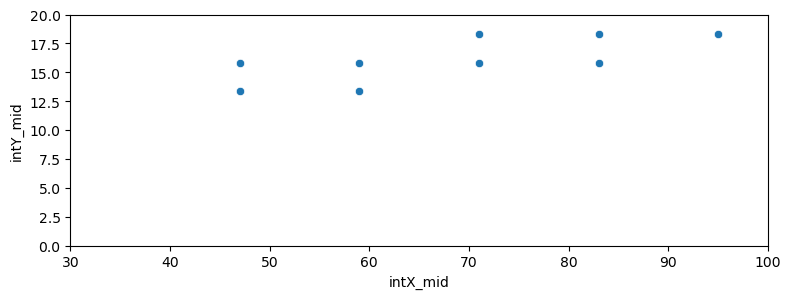

In [29]:
plt.figure(figsize=(9,3))

sns.scatterplot(x='intX_mid', y='intY_mid', data=df_pivot2)

plt.xlim([30,100])
plt.ylim([0,20]);

В статистическом смысле **регрессия** – это зависимость средних значений $\bar{y_i}$ признака-результата от соответствующих значений $x_i$ признака-фактора.

**Эмпирическая линия регрессии** $Y$ к $X$ – это ломаная, соединяющая точки $(x_i;\bar{y_i})$

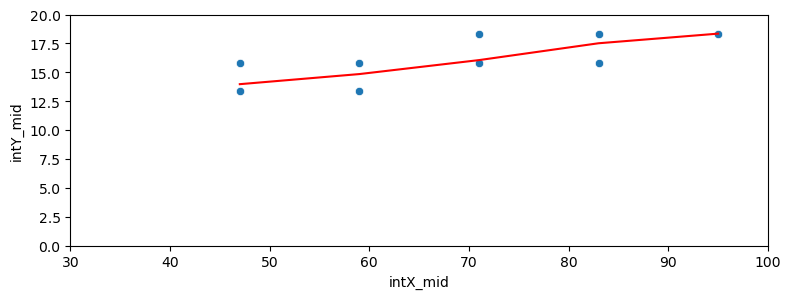

In [34]:
plt.figure(figsize=(9,3))

sns.scatterplot(x='intX_mid', y='intY_mid', data=df_pivot2)
sns.lineplot(x='intX_mid', y='My', data=df_groupX, color='r')

plt.xlim([30,100])
plt.ylim([0,20]);

Эмпирическая линия регрессии используется не только для наглядного изображения корреляционной зависимости, но и для интерполяции промежуточных значений.

Существует два «комплекта» коэффициентов $\eta^2$, $\eta$ и две линии регрессии. Это обусловлено тем, что встречаются ситуации, где признаки $X$, $Y$ взаимно влияют друг на друга.

**Первый комплект:** \
$\eta_{yx}^2 = \cfrac{\delta_y^2}{\sigma_y^2}$, $\eta_{yx} = \cfrac{\delta_y}{\sigma_y}$ – коэффициенты, которые показывают степень зависимости $Y$ от $X$. \
Графическое изображение зависимости – эмпирическая линия регрессии $Y$ к $X$ – ломаная, соединяющая точки $(x_i;\bar{y_i})$.

**Второй комплект:** \
$\eta_{xy}^2 = \cfrac{\delta_x^2}{\sigma_x^2}$, $\eta_{xy} = \cfrac{\delta_x}{\sigma_x}$ – коэффициенты, характеризующие  зависимость $X$ от $Y$. \
Эмпирическая линия регрессии $X$ к $Y$ – есть ломаная, соединяющая точки $(\bar{x_j};y_j)$.

In [36]:
df_pivot2['xn'] = df_pivot2['intX_mid'] * df_pivot2['ncomp']
df_pivot2

,intX_mid,intY_mid,ncomp,yn,xn
0,47,13.35,3,40.05,141
1,47,15.85,1,15.85,47
2,59,13.35,2,26.70,118
3,59,15.85,3,47.55,177
4,71,15.85,11,174.35,781
5,71,18.35,1,18.35,71
6,83,15.85,2,31.70,166
7,83,18.35,4,73.40,332
8,95,18.35,3,55.05,285


In [37]:
df_groupY = (df_pivot2.groupby('intY_mid')
               .agg({'xn': 'sum', 'ncomp': 'sum'})
               .reset_index()
               .rename(columns={'ncomp': 'ni'})
            )

df_groupY['Mx'] = df_groupY['xn'] / df_groupY['ni']
df_groupY

,intY_mid,xn,ni,Mx
0,13.35,259,5,51.800000
1,15.85,1171,17,68.882353
2,18.35,688,8,86.000000


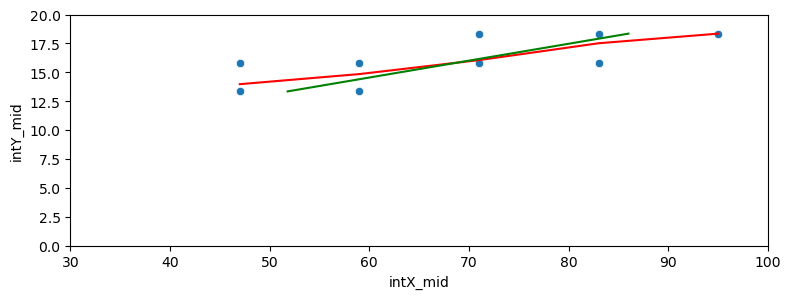

In [38]:
plt.figure(figsize=(9,3))

sns.scatterplot(x='intX_mid', y='intY_mid', data=df_pivot2)
sns.lineplot(x='intX_mid', y='My', data=df_groupX, color='r')
sns.lineplot(x='Mx', y='intY_mid', data=df_groupY, color='g')

plt.xlim([30,100])
plt.ylim([0,20]);